## Load Packages and Dependencies

In [1]:
%reload_ext autoreload
%autoreload 2

from inference import *
from network import *
from nii_acdc import traverse_files

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import glob
import random

### Load Model and Inference 

In [2]:
# Inference already included preprocess and postprocess 

# initialize model
model = AttenUnet()
checkpoint = './tmp/exp13/checkpoint.pth.tar'

# initialize inference, which includes load pretrained weight for model
# and preprocess nifti images and postprocess predictions
inference = Inference(model, checkpoint)                      

### Perform prediction on a patient case

In [3]:
patients = traverse_files('../../ACDC_datasets/testing/')

# only choose image files
patients = [f for f in patients if f.find('_gt.nii.gz') == -1 and f.find("_4d") == -1]

seed = 50
patient = patients[random.randint(0, len(patients))]

pred_masks = inference.predict(patient)
print('pred mask shape:\t', pred_masks.shape)

pred mask shape:	 (8, 216, 256)


### Visualize predicted segmentation

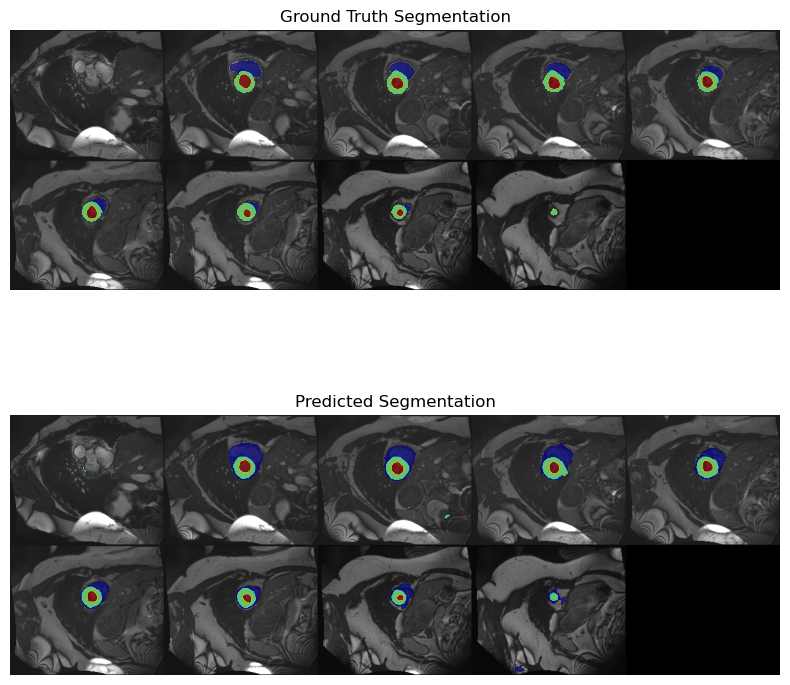

In [4]:
seed = 50
patient = patients[random.randint(0, len(patients))]

inference.plot(patient);

### Plot Training Losses

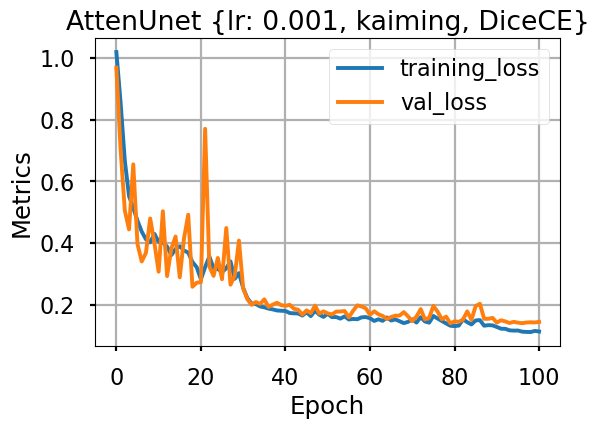

In [9]:
df = pd.read_csv('./tmp/exp13/checkpoints.csv')

plt.style.use('seaborn-v0_8-poster')
f, ax = plt.subplots(figsize=(6, 4))
df.iloc[:, 1:3].plot(ax=ax)
ax.set_title('AttenUnet {lr: 0.001, kaiming, DiceCE}')
ax.grid('on')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metrics')
f.savefig('./tmp/loss.png', dpi=300,
         transparent=False,
         bbox_inches='tight');

### Compute Metrics

In [10]:
df = pd.read_csv('./examples/results_20231003_163628.csv')
df['Dice LV'].mean(), df['Dice RV'].mean(), df['Dice MYO'].mean()

(0.908975034657657, 0.5518042402380536, 0.8309663930060778)

In [11]:
df.head()

,Name,Dice LV,Volume LV,Err LV(ml),Dice RV,Volume RV,Err RV(ml),Dice MYO,Volume MYO,Err MYO(ml)
0,patient101_frame01,0.956657,227.631486,5.033356,0.508516,379.089731,249.299140,0.785813,144.863741,17.280290
1,patient101_frame14,0.942334,158.591075,2.583969,0.382066,293.738017,223.674784,0.804662,150.650754,21.856068
2,patient102_frame01,0.819310,99.584961,20.141602,0.531055,275.683594,175.585938,0.665251,122.338867,49.218750
3,patient102_frame13,0.567866,45.385742,22.241211,0.419936,187.280273,137.475586,0.716595,125.512695,41.088867
4,patient103_frame01,0.967602,170.727539,-7.446289,0.450313,304.931641,216.040039,0.907975,168.212891,-5.541992
